# 6.4: Supervised Machine Learning: Regression

Objective: Conduct supervised macine learning - Linear Regression

This script contains the following:

## 1. [Import Libraries](#import_libraries)

## 2. [Data Cleaning](#data_cleaning)

### 2.1 [Check for Missing Values](#missing_values)

### 2.2 [Check for Duplicates](#duplicates)

### 2.3 [Extreme Values Check](#extreme_values)

## 3. [Data Prep for Regression Analysis](#prep)

## 4. [Regression Analysis](#reg_analysis)

## 5. [Compare how the Regression first the Training Set](#training)



# 1. Import Libraries<a id='import_libraries'></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
path = r'/content/drive/MyDrive/Careerfoundary/Section 6_University_Ranking'

In [ ]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'df_data_cleaned_flags.csv'))

In [ ]:
df.head()

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,Ranking_Category
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Top_Rank_University
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Top_Rank_University
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Top_Rank_University
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Top_Rank_University
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Top_Rank_University


In [ ]:
#Delete unnamed column
df= df.drop('Unnamed: 0', axis=1)

In [ ]:
df.shape

(2200, 14)

# 2. Data cleaning<a id='data_cleaning'></a>

In [ ]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'year',
       'Ranking_Category'],
      dtype='object')

In [ ]:
total_universities = df['world_rank'].max()

In [ ]:
# Create world rank as a score whereby 1st is 100, 2nd 99 etc.
df['world_rank_percentage'] = (1 - (df['world_rank'] - 1) / (total_universities - 1)) * 100

In [ ]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,Ranking_Category,world_rank_percentage
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Top_Rank_University,100.0000
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Top_Rank_University,99.8999
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Top_Rank_University,99.7998
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Top_Rank_University,99.6997
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Top_Rank_University,99.5996


# 2.1 Check for missing values<a id='missing_values'></a>

In [ ]:
# Check for missing values
df.isnull().sum()

,0
world_rank,0
institution,0
country,0
national_rank,0
quality_of_education,0
alumni_employment,0
quality_of_faculty,0
publications,0
influence,0
citations,0


In [ ]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,world_rank_percentage
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,433.346364,47.798395,2014.318182,54.095004
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.996525,7.760806,0.762130,30.462499
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000,0.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.460000,2014.000000,27.502503
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,426.000000,45.100000,2014.000000,55.005005
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.545000,2015.000000,82.507508
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000,2015.000000,100.000000


In [ ]:
# There are no missing values

In [ ]:
df.shape

(2200, 15)

# 2.2  Check for duplicates<a id='duplicates'></a>

In [ ]:
# Check for duplicates
dups = df.duplicated()

In [ ]:
# There are no duplicates
dups.shape

(2200,)

# 2.3 Extreme values checks<a id='extreme_values'></a>

<ipython-input-86-9f3b4f2940bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['world_rank_percentage'], bins=25)


<Axes: xlabel='world_rank_percentage', ylabel='Density'>

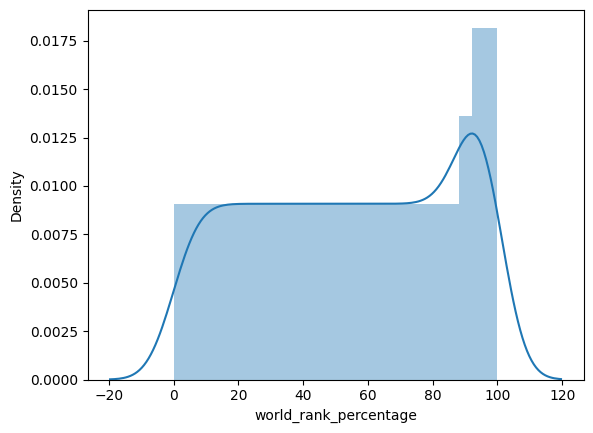

In [ ]:
sns.distplot(df['world_rank_percentage'], bins=25)

In [ ]:
# There are no extreme values, we can see the work rank as a percentage is between 0 and 100.

In [ ]:
# We can see below all of the basic statistics for the data.
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,world_rank_percentage
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,433.346364,47.798395,2014.318182,54.095004
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.996525,7.760806,0.762130,30.462499
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000,0.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.460000,2014.000000,27.502503
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,426.000000,45.100000,2014.000000,55.005005
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.545000,2015.000000,82.507508
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000,2015.000000,100.000000


## **Hypothesis: Universities that invest more in R&D have a higher overall ranking across the world.**

## 3. Data prep for regression analysis<a id='prep'></a>

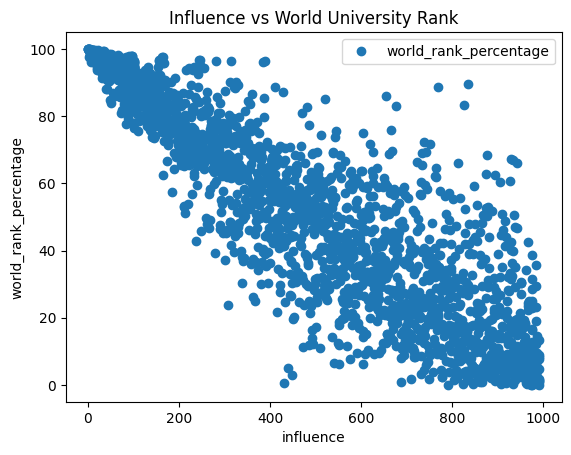

In [ ]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'influence', y='world_rank_percentage',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Influence vs World University Rank')
plt.xlabel('influence')
plt.ylabel('world_rank_percentage')
plt.show()

In [ ]:
# We can see from this scatter graph, the higher the influence rating (1 being the highest rating) the higher the university ranking percentage (100% is the highest)
# This shows strong negative correlation - low influence number mean high world rank percentage.

In [ ]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['influence'].values.reshape(-1,1)
y = df['world_rank_percentage'].values.reshape(-1,1)

In [ ]:
# View the X array
X

array([[  1],
       [  4],
       [  2],
       ...,
       [823],
       [974],
       [991]])

In [ ]:
# View the y array
y

array([[100.       ],
       [ 99.8998999],
       [ 99.7997998],
       ...,
       [  0.2002002],
       [  0.1001001],
       [  0.       ]])

In [ ]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis<a id='reg_analysis'></a>

In [ ]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [ ]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

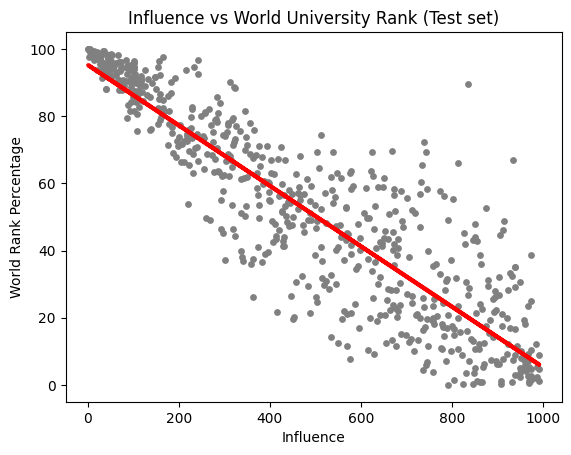

In [ ]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Influence vs World University Rank (Test set)')
plot_test.xlabel('Influence')
plot_test.ylabel('World Rank Percentage')
plot_test.show()

**Observations**

* We can see by looking at the scatterplot their is negative correlation bewtween
influence and world rank percentage.

* The regression line is a good fit with the data. It shows there is a linear relationship between influence and world rank perentage.

* While there is a strong relationship between variables there seems to be significant spread of points as the influence rank falls which may mean there may be other factors determining the world rank score.

In [ ]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [ ]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.09000846]]
Mean squared error:  179.42043706439148
R2 score:  0.8061357458752062


**Slope**

We can see there is a negative slope - when the influence number is larger the world rank percentage falls (higher influence means higher world rank), at a degree of 0.09.


**Root Mean Squared Error (MSE)**

There is quite a larger MSE, which shows there is a large distance between points and the regression line. Looking at the line graph we can see that points are very close to the regression line when the influence ranking and world rank percentage are high. However you can see there is a lot of variance as the influence level falls.


**R-squared value (RS Score)**
The RS sore is 80% which is a great percentage and shows the model is performing well. It therefore shows a linear relationship between university influence rankings and their world rank percentage.

In [ ]:
# This shows a list of all predicted y values.
y_predicted

array([[91.55811688],
       [87.23771056],
       [88.31781214],
       [75.80663552],
       [29.54228454],
       [92.36819306],
       [69.23601758],
       [72.83635617],
       [70.49613609],
       [19.46133647],
       [29.18225068],
       [ 9.74042225],
       [11.81061695],
       [23.06167506],
       [ 8.30028681],
       [49.97420608],
       [ 8.03026142],
       [34.67276704],
       [ 6.05007519],
       [17.66116717],
       [13.88081164],
       [48.08402832],
       [64.10553507],
       [30.80240305],
       [24.14177664],
       [19.19131107],
       [23.42170892],
       [68.96599218],
       [76.8867371 ],
       [86.60765131],
       [26.84203059],
       [88.76785447],
       [86.15760898],
       [65.99571284],
       [42.14346963],
       [19.91137879],
       [10.82052383],
       [11.18055769],
       [83.00731271],
       [43.31357967],
       [86.15760898],
       [33.86269086],
       [66.3557467 ],
       [81.29715188],
       [73.73644082],
       [44

In [ ]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,87.987988,91.558117
1,83.283283,87.237711
2,90.890891,88.317812
3,93.593594,75.806636
4,47.147147,29.542285
5,92.992993,92.368193
6,63.463463,69.236018
7,80.080080,72.836356
8,75.375375,70.496136
9,13.613614,19.461336


**Obervation**

By looking at the difference between predicted and actual we can see that accurancy varies. This follows the same pattern as the scatterplot. High rank universities shows a strong linear relationship between the influence rank and world rating percentage with points close to the regression line. Howwever as the influence rank falls the points spread from the regression line.

In [ ]:
# By looking at the difference we can see some predictions we close however overall there is a lot variation in the models accuracy.

# 5. Compare how the regression fits the training set<a id='training'></a>

This comparison is to check for overfitting (using the training data)


In [ ]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [ ]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [ ]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.09000846]]
Mean squared error:  184.7701015461621
R2 score:  0.8009549736328745


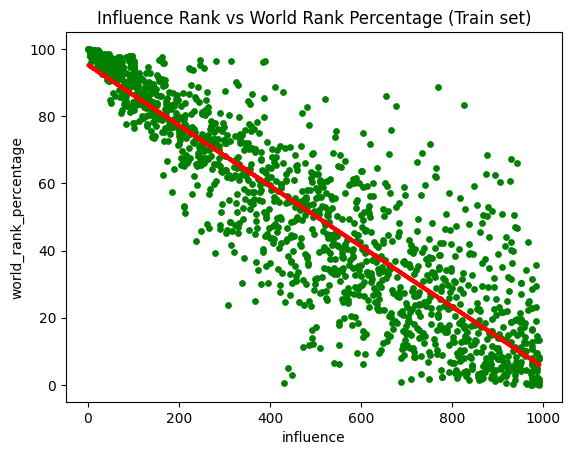

In [ ]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Influence Rank vs World Rank Percentage (Train set)')
plot_test.xlabel('influence')
plot_test.ylabel('world_rank_percentage')
plot_test.show()

**Obervation**

We can see that the slope, mean squared error, R2 score have not changed very much therefore we have not overfit the model. This further confirms a fairly strong linear relationship.

**Bias**

Everythough there is a linear relationship between influence and world rank there may be a bias. Influence relates to the impact and influence of universities research and academic work.Therefore, with an 80% RS score the linear model is a great fit and shows, while the influence rating rises so does the world rank percentage of the university. This helps prove the hypothesis that **Univeristies that invest more in R&D have a higher overall ranking across the world.**

However, if a university has a high world rank, it may be more likely that research and academic work is more widely recognised resulting in a higher influence rank. The prestigious status of a university like Harvard might lead to research being more widely recognised, boosting its influence score, rather than the influence alone driving the world ranking.

It would also be interesting to see if there is a relationship between publications/patents and world rank as they represent other areas relating to R&D. This bias could impact the validity of the conclusion that investment in R&D directly leads to higher world rankings and there may be a more complicated relationship between variables.

In [ ]:
df.shape

(2200, 15)

In [ ]:
# Export data frame with university rank percentage

df.to_csv(os.path.join(path,'02 Data', 'Prepared_Data', 'df_data_cleaned_dervived.csv'))
